# Gradient Descent

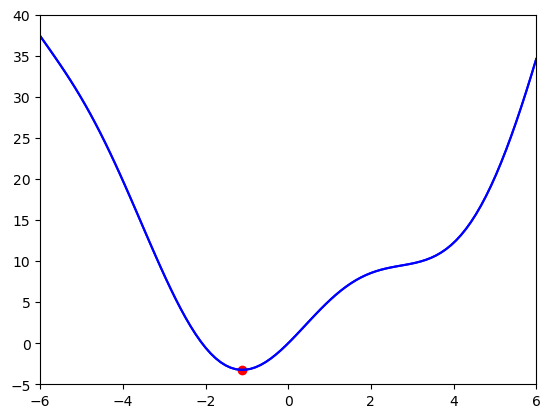

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

def f(x: np.float64) -> np.float64:
    return x**2 + 5*np.sin(x)

def f_deri(x: np.float64) -> np.float64:
    return 2*x + 5*np.cos(x)

def myGD1(x0: np.float64, eta: np.float64):
    x = [x0]
    for it in range(100):
        x_old = x[-1]
        x_new = x_old - eta*f_deri(x_old)
        if np.abs(f_deri(x_new)) < 1e-3:
            break
        x.append(x_new)
    
    return x, it

x1_ = myGD1(5, 0.1)
x2_ = myGD1(-5, 0.1)

fig, ax = plt.subplots()

x = np.linspace(-6, 6, 100)
y = np.array(f(x))

line, = ax.plot([], [], 'ro')

ax.set_xlim(-6,6)
ax.set_ylim(-5,40)

x1 = x1_[0]
y1 = np.array([f(t) for t in x1])

def init_func():
    ax.plot(x, y, 'b')
    return line

def update(frame):
    #line.set_data(x1, y1)
    line.set_data([x1[frame]], [y1[frame]])
    return line,

anim = animation.FuncAnimation(fig=fig, func=update, frames=range(len(x1)), interval=200, init_func=init_func, repeat=False)

#plt.show()
HTML(anim.to_jshtml())